## Oscilador harmônico amortecido

### Considerando a EDO do oscilador harmônico: $\frac{d^2x}{dt^2}=-\omega_0^2x-b\frac{dx}{dt}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

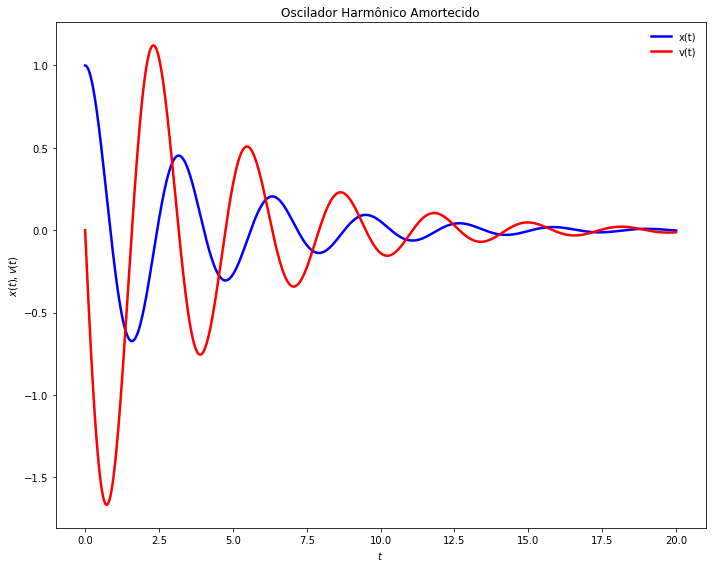

In [ ]:
"""
Simulação numérica de um oscilador harmônico amortecido usando o método de Runge-Kutta de quarta ordem (RK4).

Este script modela a dinâmica de um sistema massa-mola com amortecimento linear, resolvendo a equação diferencial de segunda ordem:
    x'' + b x' + ω₀² x = 0
onde:
    - x é a posição,
    - x' é a velocidade,
    - x'' é a aceleração,
    - b é o coeficiente de amortecimento,
    - ω₀ é a frequência natural do sistema.

O sistema de EDOs é reescrito como um sistema de duas equações de primeira ordem e resolvido numericamente com o método RK4.

Componentes principais:
- Definição do sistema de EDOs via função `f(t, y)`.
- Implementação do método de Runge-Kutta de quarta ordem `rk4_step`.
- Integração da solução no intervalo de tempo definido.
- Plotagem dos resultados de posição x(t) e velocidade v(t) ao longo do tempo.


"""


omega0 = 2.0   # frequência natural
b = 0.5        # coeficiente de amortecimento

# função  EDs
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega0**2 * x - b * v
    return np.array([dxdt, dvdt])

#  método de Runge-Kutta de quarta ordem
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


x0 = 1.0  # posição inicial
v0 = 0.0  # velocidade inicial
y0 = np.array([x0, v0])


t0 = 0.0
tf = 20.0
h = 0.01
N = int((tf - t0) / h)


ts = np.linspace(t0, tf, N+1)
ys = np.zeros((N+1, 2))
ys[0] = y0


for i in range(N):
    ys[i+1] = rk4_step(f, ts[i], ys[i], h)


xs = ys[:, 0]
vs = ys[:, 1]


plt.figure(figsize=(10, 8))
plt.plot(ts, xs, label='x(t)',color='blue',linewidth=2.5)
plt.plot(ts, vs, label='v(t)',color='red',linewidth=2.5)
plt.xlabel(r'$t$')
plt.ylabel('$x(t), v(t)$')
plt.title('Oscilador Harmônico Amortecido')
plt.legend()



plt.tight_layout()
plt.grid(False)
plt.legend(frameon=False)
plt.show()

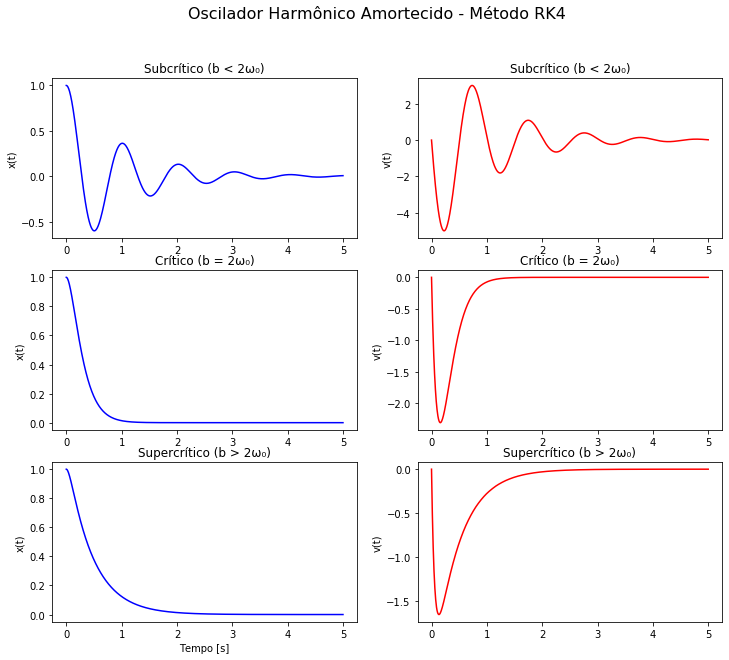

In [ ]:
"""
Simulação de diferentes regimes de amortecimento em um oscilador harmônico usando o solucionador de EDOs `solve_ivp`.

Este script analisa o comportamento de um oscilador harmônico amortecido nos três regimes clássicos:
    - Subcrítico (b < 2ω₀)
    - Crítico (b = 2ω₀)
    - Supercrítico (b > 2ω₀)

O sistema físico é modelado pela equação diferencial:
    x'' + b x' + ω₀² x = 0

que é convertida em um sistema de equações de primeira ordem e resolvida numericamente com o método `RK45` via `scipy.integrate.solve_ivp`.

Componentes principais:
- Definição do sistema de EDOs na função `sistema`.
- Configuração dos parâmetros físicos e condições iniciais.
- Simulação para diferentes valores do coeficiente de amortecimento `b`.
- Visualização da posição x(t) e velocidade v(t) para cada regime em subplots organizados.

"""


omega0 = 2 * np.pi


T_max = 5
t_eval = np.linspace(0, T_max, 1000)


x0 = 1.0
v0 = 0.0
y0 = [x0, v0]

# Sistema de EDO
def sistema(t, y, omega0, b):
    x, v = y
    dxdt = v
    dvdt = -omega0**2 * x - b * v
    return [dxdt, dvdt]

# Amortecimentos: subcrítico, crítico, supercrítico
regimes = {
    'Subcrítico (b < 2ω₀)': 2.0,
    'Crítico (b = 2ω₀)': 2 * omega0,
    'Supercrítico (b > 2ω₀)': 20.0
}


fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Oscilador Harmônico Amortecido - Método RK4", fontsize=16)

for i, (regime, b) in enumerate(regimes.items()):
    sol = solve_ivp(sistema, [0, T_max], y0, args=(omega0, b), t_eval=t_eval, method='RK45')
    
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]
    
    axs[i][0].plot(t, x, label=r'$x(t)$',color='blue')
    axs[i][1].plot(t, v, label=r'$v(t)$', color='red')
    
    axs[i][0].set_ylabel('x(t)')
    axs[i][1].set_ylabel('v(t)')
    axs[i][0].set_title(regime)
    axs[i][1].set_title(regime)
    axs[i][0].grid(False)
    axs[i][1].grid(False)

# Eixos X
axs[2][0].set_xlabel('Tempo [s]')
axs[2]

plt.show()



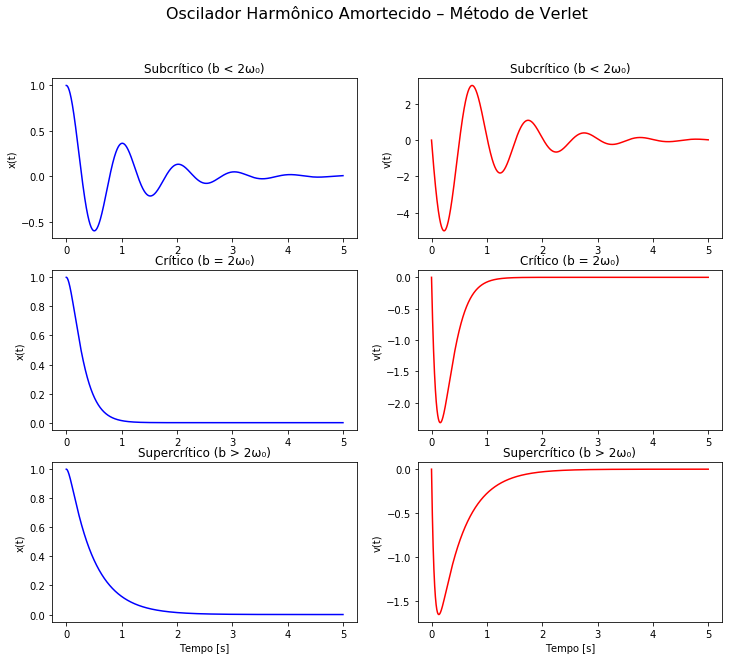

In [ ]:
"""
Simulação do oscilador harmônico amortecido utilizando o método de Verlet.

Este script modela a dinâmica de um sistema massa-mola com amortecimento linear, resolvendo numericamente a equação:
    x'' + b x' + ω₀² x = 0
onde:
    - x é a posição,
    - x' é a velocidade,
    - x'' é a aceleração,
    - b é o coeficiente de amortecimento,
    - ω₀ é a frequência natural do sistema.

O método de integração numérica empregado é o **Velocity Verlet**, conhecido por sua estabilidade em simulações físicas.

Características do código:
- Simula o sistema para três regimes de amortecimento:
    1. Subcrítico (b < 2ω₀)
    2. Crítico (b = 2ω₀)
    3. Supercrítico (b > 2ω₀)
- Implementa uma função `velocity_verlet(b)` que retorna a posição e velocidade do sistema ao longo do tempo.
- Gera gráficos comparando x(t) e v(t) para cada regime.

Parâmetros principais:
- `omega0`: frequência natural do sistema (rad/s)
- `h`: passo de tempo
- `T_max`: tempo total da simulação
- `x0`, `v0`: condições iniciais de posição e velocidade

"""


omega0 = 2 * np.pi   # Frequência natural 
T_max = 5            # Tempo total
h = 0.001            # Passo de tempo
t = np.arange(0, T_max, h)
n = len(t)


x0 = 1.0
v0 = 0.0

# Regimes de amortecimento
regimes = {
    'Subcrítico (b < 2ω₀)': 2.0,
    'Crítico (b = 2ω₀)': 2 * omega0,
    'Supercrítico (b > 2ω₀)': 20.0
}

# método de Velocity Verlet
def velocity_verlet(b):
    x = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)

   
    x[0] = x0
    v[0] = v0
    a[0] = -omega0**2 * x[0] - b * v[0]

    for i in range(n - 1):
        x[i+1] = x[i] + v[i]*h + 0.5*a[i]*h**2
        a_next = -omega0**2 * x[i+1] - b * v[i]  
        v[i+1] = v[i] + 0.5*(a[i] + a_next)*h
        a[i+1] = a_next

    return x, v


fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Oscilador Harmônico Amortecido – Método de Verlet", fontsize=16)

for i, (nome, b) in enumerate(regimes.items()):
    x, v = velocity_verlet(b)
    
    axs[i][0].plot(t, x, label=r'$x(t)$',color='blue')
    axs[i][1].plot(t, v, label=r'$v(t)$', color='red')

    axs[i][0].set_ylabel('x(t)')
    axs[i][1].set_ylabel('v(t)')
    axs[i][0].set_title(nome)
    axs[i][1].set_title(nome)
    axs[i][0].grid(False)
    axs[i][1].grid(False)

# Eixos X
axs[2][0].set_xlabel('Tempo [s]')
axs[2][1].set_xlabel('Tempo [s]')
plt.show()
